In [ ]:
# Ref: https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html

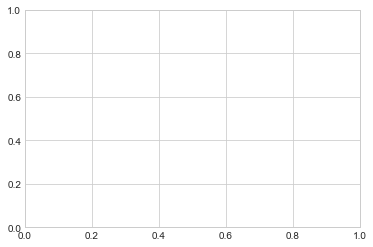

In [6]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

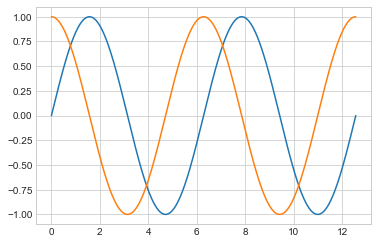

In [19]:
x = np.linspace(0,4*np.pi,1000)
ax = plt.axes()
ax.plot(x, np.sin(x)) # NOTE: vscode issue: you need to declare the ax object in the same cell for the plot to show up.
ax.plot(x, np.cos(x))

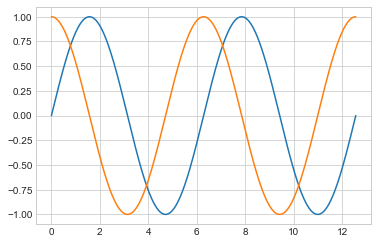

In [18]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

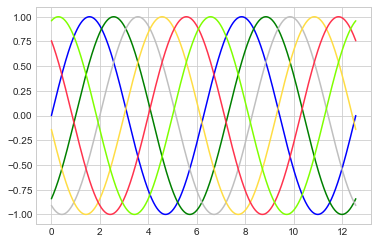

In [25]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

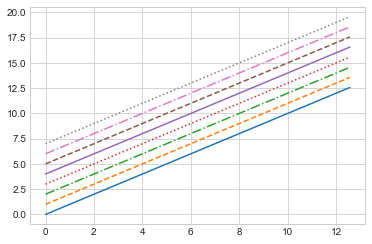

In [27]:
# supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

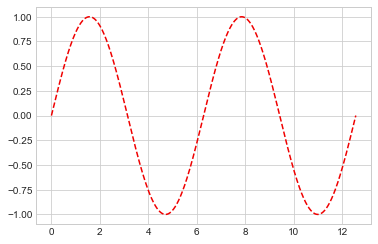

In [47]:
plt.plot(x, np.sin(x), color="#F00000", linestyle="dashed")

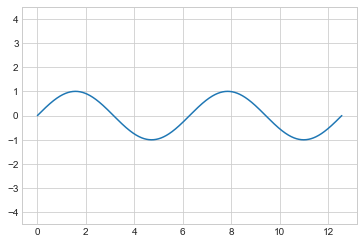

In [48]:
plt.plot(x, np.sin(x))
plt.axis('equal');

# Scatter Plots

The primary difference of plt.scatter from plt.plot is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.



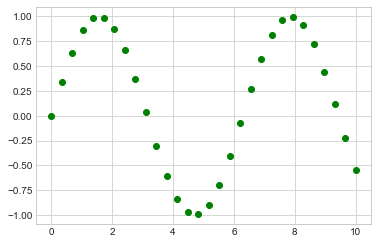

In [49]:
x = np.linspace(0,10,30)
y = np.sin(x)

plt.plot(x,y,'o',color='green')

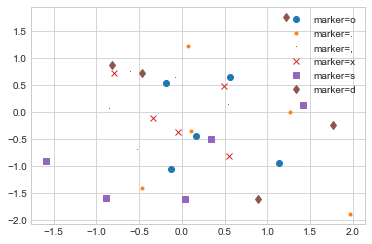

In [62]:
rng = np.random.Generator(np.random.PCG64())
for marker in ['o','.',',','x','s','d']:
    plt.plot(rng.standard_normal(5), rng.standard_normal(5), marker, label=f"marker={marker}")
plt.legend(numpoints=1)


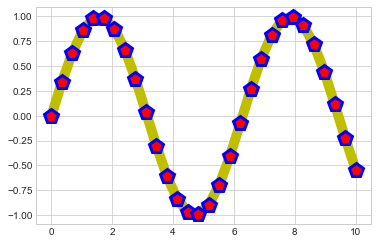

In [71]:
plt.plot(np.linspace(0,4*np.pi,), y, '-p', color='y',
markersize=15, linewidth=10, markerfacecolor='red',markeredgecolor='blue',markeredgewidth=3)

/var/folders/pp/st7r4cq55bddv8kl4v7w297r0000gn/T/ipykernel_26964/731690019.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


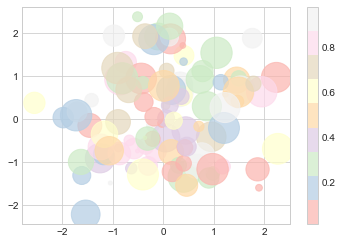

In [82]:
rand_gen = np.random.RandomState(0)
x = rand_gen.randn(100)
y = rand_gen.randn(100)
colors = rand_gen.rand(100)
sizes = 1000 * rand_gen.rand(100)

plt.scatter(x,y,c=colors,s=sizes,alpha=0.7,cmap='Pastel1')
plt.colorbar()

Text(0, 0.5, 'sepal width (cm)')

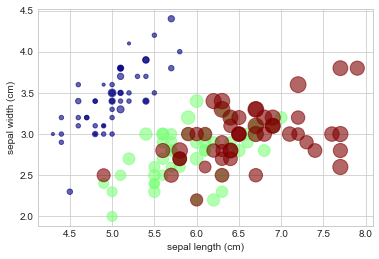

In [89]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.6, s=100*features[3], c=iris.target, cmap='jet')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data: the (x, y) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower. Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

In [91]:
print(f"{[f for f in iris.feature_names]}")

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [92]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Aside from the different features available in plt.plot and plt.scatter, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, plt.plot can be noticeably more efficient than plt.scatter. The reason is that plt.scatter has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually. In plt.plot, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data. For large datasets, the difference between these two can lead to vastly different performance, and for this reason, plt.plot should be preferred over plt.scatter for large datasets.